In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': (40, 8), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False})

%load_ext autoreload
%autoreload 2

import jax
jax.config.update('jax_platform_name', 'cpu')
    
from smolyax import indices, nodes
from smolyax.interpolation import SmolyakBarycentricInterpolator

def target_f_2d_to_1d(x):
    x = np.atleast_2d(x)
    y = np.sin(2 * np.pi * x[:, 0]) * np.cos(2 * np.pi * x[:, 1])
    return y

def get_meshgrid(node_gen, n=100) :
    xs = [np.linspace(-1, 1, n) for gi in node_gen]
    return np.meshgrid(*xs)

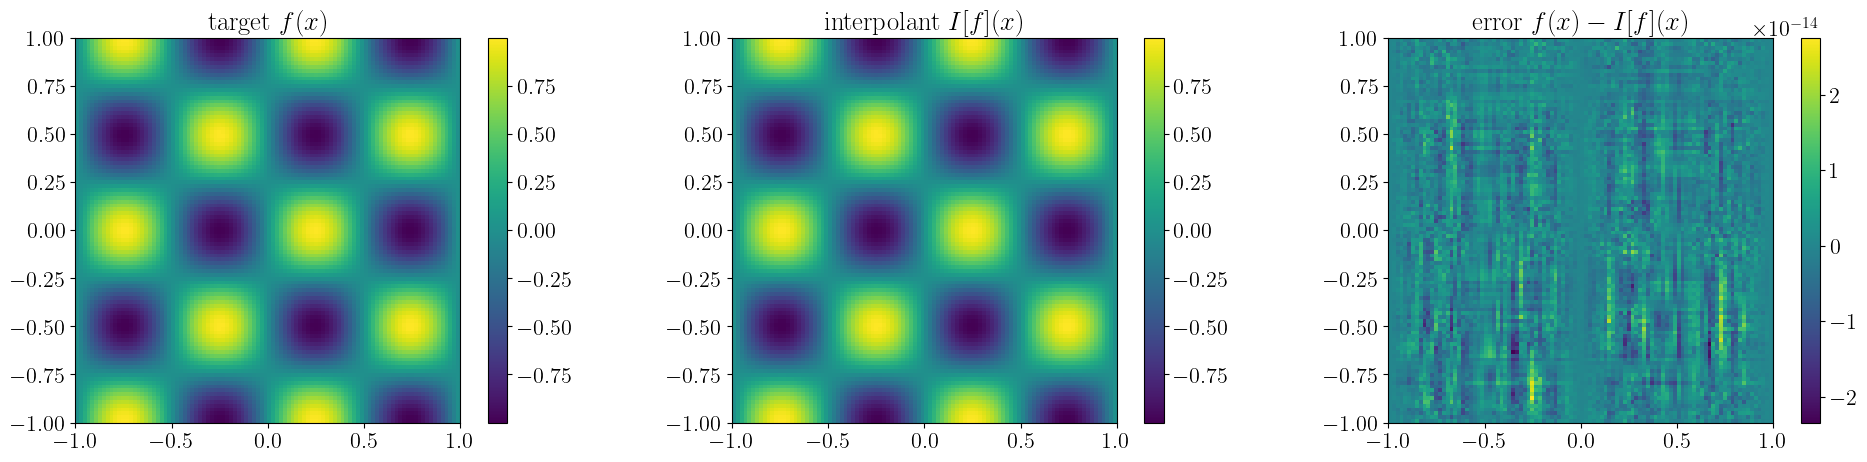

In [2]:
node_gen = nodes.Leja(dim=2)
t = 40
ip = SmolyakBarycentricInterpolator(node_gen=node_gen, k=[1,1], t=t, d_out=1, f=target_f_2d_to_1d)

n = 100
X, Y = get_meshgrid(node_gen, n)
Z_f = target_f_2d_to_1d(np.stack([X.ravel(), Y.ravel()], axis=1)).reshape(n, n)
Z_ip = ip(np.stack([X.ravel(), Y.ravel()], axis=1)).reshape(n, n)
Z_err = Z_f - Z_ip

fig, axes = plt.subplots(1, 3, figsize=(24, 5))
for ax, Z, title in zip(axes, [Z_f, Z_ip, Z_err], [r'target $f(x)$', 'interpolant $I[f](x)$', 'error $f(x)-I[f](x)$']):
    im = ax.imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower')
    ax.set_title(title); fig.colorbar(im, ax=ax)

plt.show()